/tmp/ipython-input-2-1809613183.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=post_type_counts.index, y=post_type_counts.values, palette='Blues_d')
/tmp/ipython-input-2-1809613183.py:34: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


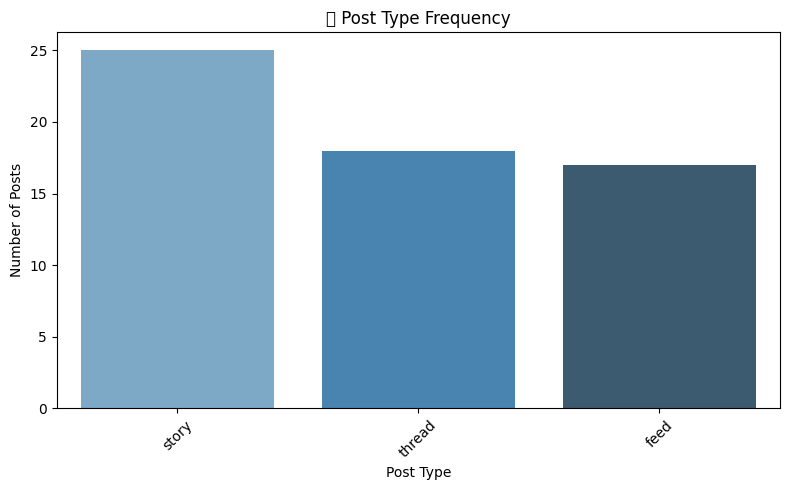

/tmp/ipython-input-2-1809613183.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


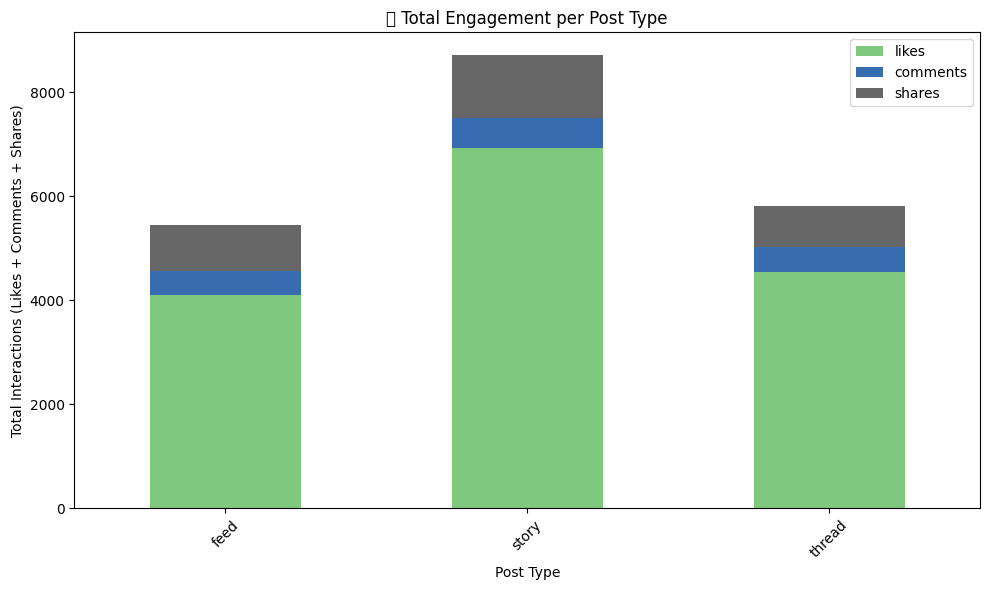

/tmp/ipython-input-2-1809613183.py:63: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


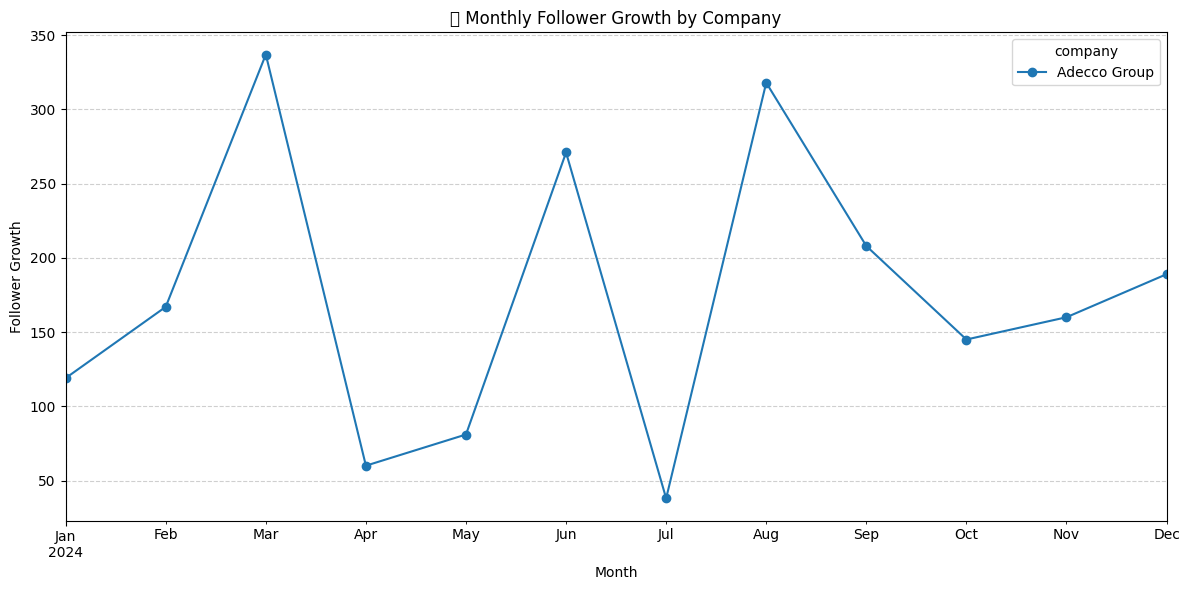

/tmp/ipython-input-2-1809613183.py:79: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


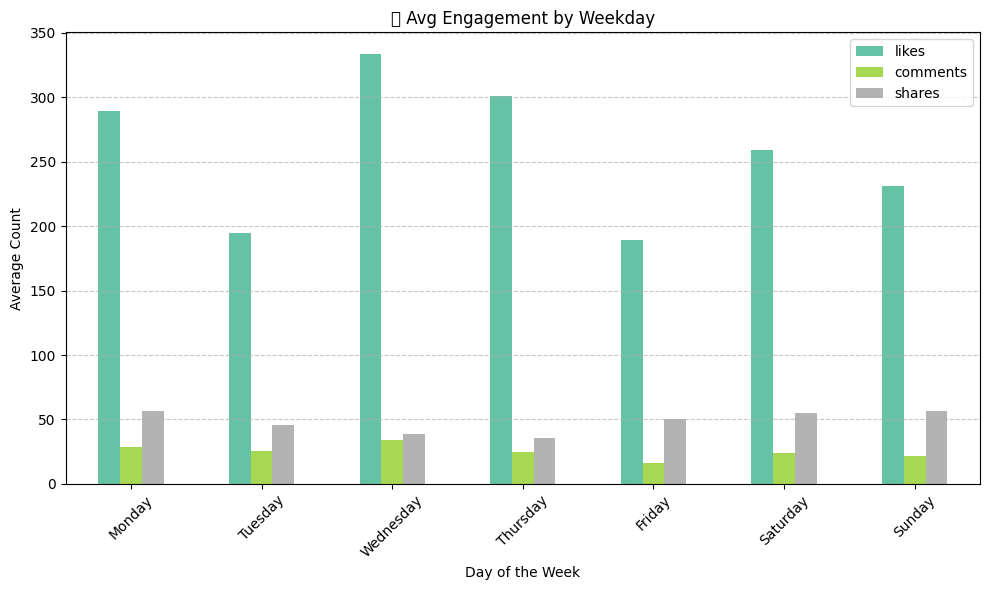

❌ No posts mentioning data/analyst roles found.

🔥 Top 5 Engaging Posts:
     post_date  platform    content_highlight  likes  comments  shares
128 2024-12-11  LinkedIn   Leadership message    483        42      11
61  2024-01-07  LinkedIn   Remote work trends    481         5      26
112 2024-11-10  LinkedIn  New hiring campaign    473        18      54
66  2024-11-07  LinkedIn   Remote work trends    470        18      65
33  2024-06-05  LinkedIn  New hiring campaign    467        44      37


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------
# Load and Clean the Data
# -------------------------------------
df = pd.read_csv("/content/adecco_social_media_dataset.csv")

df['post_date'] = pd.to_datetime(df['post_date'], errors='coerce')
df = df.dropna(subset=['post_date'])

df['likes'] = pd.to_numeric(df['likes'], errors='coerce').fillna(0)
df['comments'] = pd.to_numeric(df['comments'], errors='coerce').fillna(0)
df['shares'] = pd.to_numeric(df['shares'], errors='coerce').fillna(0)
df['follower_delta'] = pd.to_numeric(df['follower_delta'], errors='coerce').fillna(0)

df['month'] = df['post_date'].dt.to_period('M')
df['weekday'] = df['post_date'].dt.day_name()

# Insight: Tells you where to focus social media energy

# -----------------------------------------------
# 1. Bar Chart: Frequency of Post Types
# -----------------------------------------------
post_type_counts = df['post_type'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=post_type_counts.index, y=post_type_counts.values, palette='Blues_d')
plt.title("📝 Post Type Frequency")
plt.xlabel("Post Type")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight: Are you posting enough job openings or youth-relevant content?

# -----------------------------------------------------
# 2. Stacked Bar Chart: Engagement by Post Type
# -----------------------------------------------------
engagement_totals = df.groupby('post_type')[['likes', 'comments', 'shares']].sum()

engagement_totals.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title("📊 Total Engagement per Post Type")
plt.xlabel("Post Type")
plt.ylabel("Total Interactions (Likes + Comments + Shares)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insight: Which format generates most interaction?

# -----------------------------------------------
# 3. Monthly Follower Growth
# -----------------------------------------------
growth = df.groupby(['company', 'month'])['follower_delta'].sum().unstack(0)
growth.plot(marker='o', figsize=(12, 6))
plt.title("📈 Monthly Follower Growth by Company")
plt.ylabel("Follower Growth")
plt.xlabel("Month")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 4. Avg Engagement by Day of Week
# -----------------------------------------------
engagement_by_day = df.groupby('weekday')[['likes', 'comments', 'shares']].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
engagement_by_day = engagement_by_day.reindex(weekday_order)

engagement_by_day.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Avg Engagement by Weekday")
plt.ylabel("Average Count")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -----------------------------------------------
# 5. Data Analyst Role Mentions
# -----------------------------------------------
keywords = ['data analyst', 'analytics', 'data science', 'business analyst', 'bi analyst']
df['content_highlight'] = df['content_highlight'].fillna('').astype(str)
df['data_analyst_mention'] = df['content_highlight'].apply(
    lambda x: any(k in x.lower() for k in keywords)
)

analyst_posts = df[df['data_analyst_mention']]
analyst_count = analyst_posts['platform'].value_counts()

if not analyst_count.empty:
    analyst_count.plot(kind='bar', color='orange', figsize=(6, 4), title='📊 Data/Analytics Job Mentions per Platform')
    plt.ylabel("Post Count")
    plt.xlabel("Platform")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print("\n🧠 Sample Posts Mentioning Data/Analyst Roles:")
    print(analyst_posts[['post_date', 'platform', 'content_highlight']].head(5))
else:
    print("❌ No posts mentioning data/analyst roles found.")

# -----------------------------------------------
# 6. Top 5 Most Engaging Posts
# -----------------------------------------------
top_posts = df.sort_values(by=['likes', 'comments', 'shares'], ascending=False).head(5)
print("\n🔥 Top 5 Engaging Posts:")
print(top_posts[['post_date', 'platform', 'content_highlight', 'likes', 'comments', 'shares']])
